In [1]:
from sage.modules.free_module_integer import IntegerLattice
import numpy as np
import matplotlib.pyplot as plt

p=17
n=4
d=n//2
t=int(log(n))

In [2]:
Zp.<x>=PolynomialRing(Integers(p))

In [3]:
matrix.toeplitz(list(Zp.random_element(n-1))+([0]*(d-1)),[0]*(d-1))

[ 5  0]
[ 3  5]
[ 1  3]
[10  1]
[ 0 10]

In [4]:
def rank(t):
    M=matrix.toeplitz(list(Zp.random_element(n-1))+([0]*(d-1)),[0]*(d-1))
    for i in range(t-1):
        M=M.augment(matrix.toeplitz(list(Zp.random_element(n-1))+([0]*(d-1)),[0]*(d-1)))
    return (M.transpose()).rank()


In [10]:
max=32
nb=5
L=[]
s=0
for i in range(21,max+1) :
    
    n=i
    p=next_prime(int(n**(1.5)))
    d=n//2
    t=int(log(n))
    Zp.<x>=PolynomialRing(Integers(p))
    
    m=0
    for i in range(nb):
        if rank(t)==(n+d-1):
            m+=1
        else:
            print("boom")
    avg=m/nb

In [8]:
cond=true
iter=0
print(n)
print(d)
print(t)
print(p)
print("--- Début ---")
while cond :
    cond=(rank(4)==(n+d-1))
    iter+=1
print("boom")
print(iter)

32
16
3
37
--- Début ---
boom
24687


5

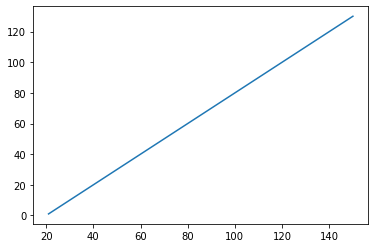

In [71]:
plt.plot(range(21,max+1),L)

In [11]:
((n+d-1)/p)**int(((t*d)/(n+d-1)))

47/191